# Table of Contents

# 01. Importing Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Importing Data

In [3]:
# Create path
path = r"C:\Users\erj03\OneDrive\Documents\Achievement 6"

In [4]:
# Import dataset
df = pd.read_csv(os.path.join('insurance_clean.csv'), index_col = False)

In [19]:
# View dataframe
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [24]:
# Check shape
df.shape

(1337, 7)

# 03. Correlation Analysis

In [32]:
# Create subset of numerical variables
subset = df[['age', 'bmi', 'children', 'charges']]

In [33]:
# View subset
subset.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

In [35]:
# Create correlation table
subset.corr()

age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

## Create Correlation Heatmap with Matplotlib

Text(0.5, 1.0, 'Correlation Matrix')

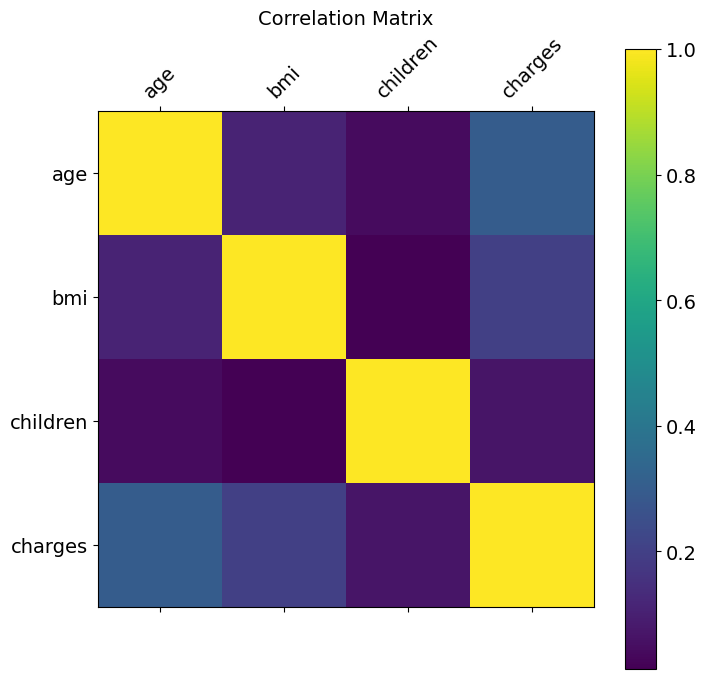

In [40]:
f = plt.figure(figsize=(8, 8)) 
plt.matshow(subset.corr(), fignum=f.number)
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=14, rotation=45)
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

## Create Correlation Heatmap with Seaborn

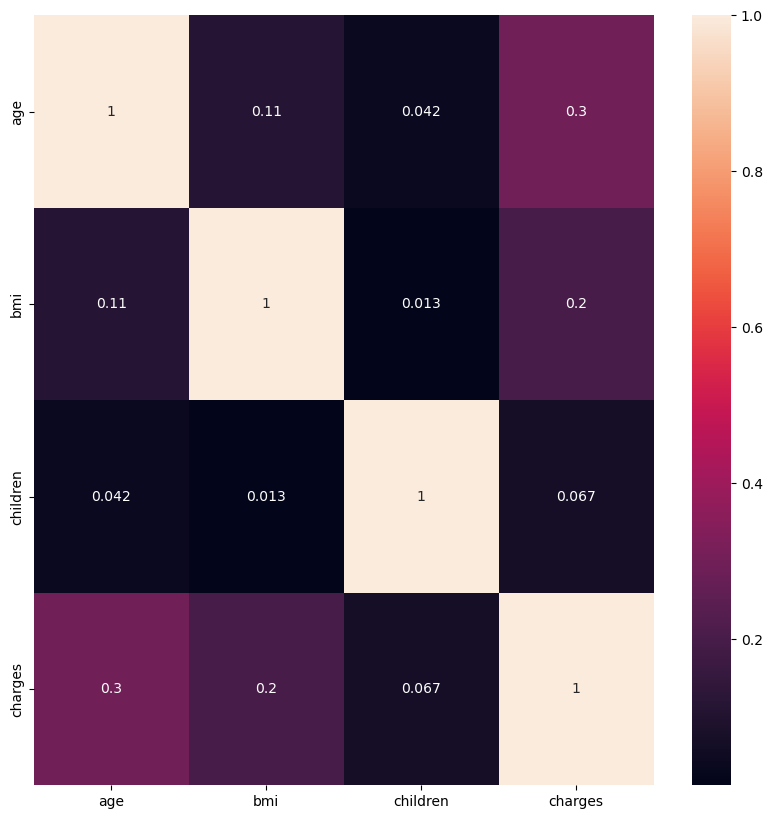

In [42]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(subset.corr(), annot = True, ax = ax)

The focus of interest here is the correlation betwen charges and the other variables. Based on the correlation heatmap, none of the variables have a strong correlation. Charges and age have have the strongest correlation with a correlation coefficient of 0.3, however this is still considered weak. Charges and bmi also have a weak correlation of 0.2. Charges and number of children have almost no correlation with a coefficient of 0.067.

# 04. Scatterplot Analysis

## Charges and Age

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


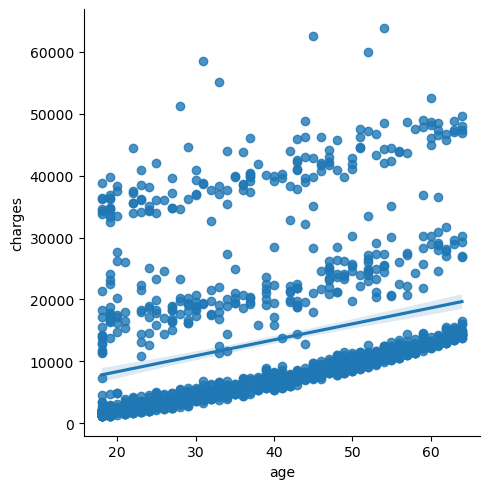

In [43]:
# Create scatterplot for 'charges' and 'age' columns
sns.lmplot(x = 'age', y = 'charges', data = df)

The scatterplot contains a lot of variability but still gives some insight between charges and age. There is a large grouping of customers that lie between $0-$15,000 in charges. Another group between $15,000-$30,000 in charges, and a third group with $30,000+ in charges. Each group could have their own line of best fit that would be trending upwards. This could possibly signifiy preexsiting conditions that the dataset does not consider. For example, the first grouping with the lowest charges could belong to individuals that are considered healthy and do not need regular medical care. The last group might be indivuals with chronic or severe conditions that require them to seek medical care frequently. The middle grouping could be those who fall inbetween. Either way, we see that charges almost always get higher with age. 

## Charges and BMI

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


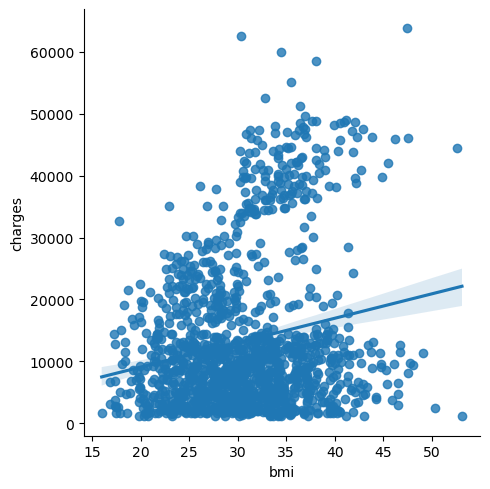

In [44]:
# Create scatterplot for 'charges' and 'age' columns
sns.lmplot(x = 'bmi', y = 'charges', data = df)

This scatterplot is not quite as straightforward as the previous one, which would make sense since the correlation for these two variables is slightly weaker. Again if you were to make groups by charges, you would see different lines of best fit. For charges less than $15,000 the line of best fit would increase gradually. If you were to only look at charges greater than $15,000 you would see a much steeper line. 

# 05. Pair Plot Analysis

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

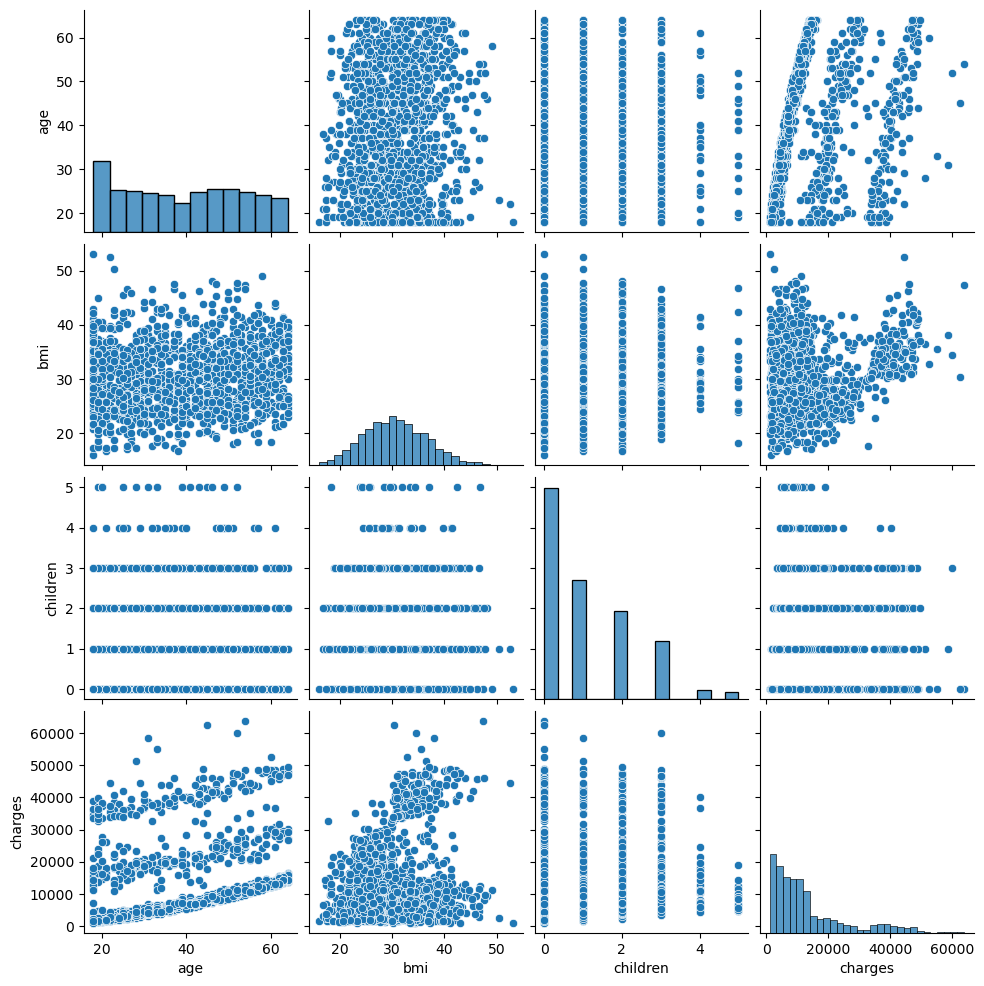

In [46]:
g = sns.pairplot(subset)

Again the main focus of our analysis is comparing charges with the other variables. For age and bmi we are given the same information. I think the most significant insight here is that when crossing the charges and number of children we see the highest charge is for an individual with no children. For specifically women with children you would think that they'd have higher charges because having a child in hopsital can be rather expensive. Potentially this individual with the highest charge could be someone with an extreme condition that requires them to seek medical care frequently but does not allow them to have children.

# 06. Categorical Analysis

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

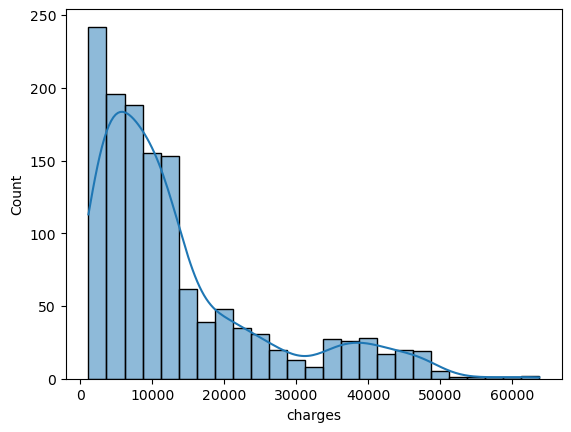

In [6]:
# Use histogram to visual distribution of charges column
sns.histplot(df['charges'], bins = 25, kde = True)

In [8]:
# Create low charges flag
df.loc[df['charges'] < 15000, 'Charges Category'] = 'Low Charges'

In [9]:
# Create middle charges flag
df.loc[(df['charges'] >= 15000) & (df['charges'] < 30000), 'Charges Category'] = 'Middle Charges'

In [14]:
# Create high charges flag
df.loc[(df['charges'] >= 30000), 'Charges Category'] = 'High Charges'

In [15]:
# Check values counts of new price charges category column
df['Charges Category'].value_counts(dropna = False)

Charges Category
Low Charges       1065
High Charges       162
Middle Charges     111
Name: count, dtype: int64

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


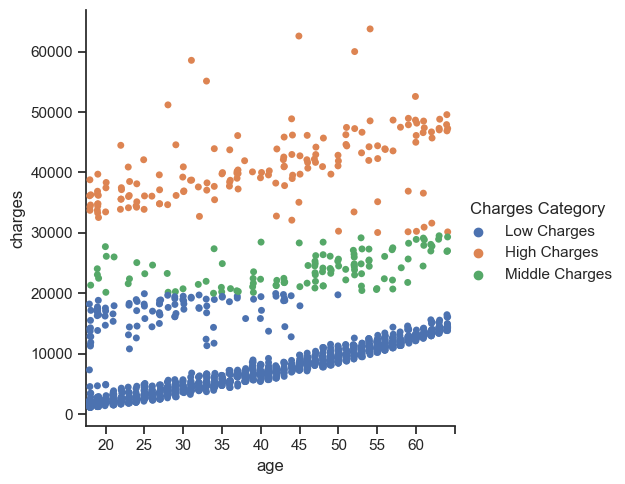

In [23]:
sns.set(style="ticks")
g = sns.catplot(x="age", y="charges", hue="Charges Category", data=df)
ax = g.ax
ax.set_xticks([2, 7, 12, 17, 22, 27, 32, 37, 42, 47]) 

Again you cant see 3 distinct groups of the charges by age categories where the most significant ovbservation is that the amount of charges trends upward as people age. I could tweak the categories slightly because in the younger ages the two bottom groups are meshing together a little bit more but I wouldn't want it to affect the later ages.

# 07. Questions

## How does the number of children one has affect the total charges they accrue?

Number of children has no significant affect on total charges.

## Does age have an affect on charges accrued?

Of all the numerical variables age has the strongest correlation with higher medical charges.

# 08. Hypothesis